In [ ]:
import math

## Parameters

# Metal Testing
metal = "lead"
# metal = "cadmium"

# Proportional constant for consumption vs storage
r = 0.1

# Constant input of candy
k = 50

# Concentrations
m = None
if metal == "lead":
  m = .615 # lead (mcg/serving)
elif metal == "cadmium":
  m = 6.986 # cadmium (mcg/serving)

# Helper function for intake
def annual_helper(day, shift, A0):
  return A0 * pow(math.e, -r*((day-shift) % 365))

# Returns how much candy one might have in some day
def annual_intake(day):
  A = annual_helper(day, 98, 100) + annual_helper(day, 304, 97) + annual_helper(day, 45, 97) + annual_helper(day, 359, 85) + k
  return A

def propensity(day):
  year = day // 365
  if year < 4:
    return .86
  if year < 10:
    return .84
  if year < 17:
    return 1
  if year < 44:
    return .96
  return .80

def blood_half_life_helper(day):
  year = day / 365
  return 2.9191 * year + 1.67

def removal_constant(day):
  return math.log(2) / blood_half_life_helper(day)

# Returns how much one intakes in some day
def intake(day):
  return annual_intake(day) * propensity(day) * m * r


if __name__ == "__main__":
  print(intake(98))

7.959245975822909


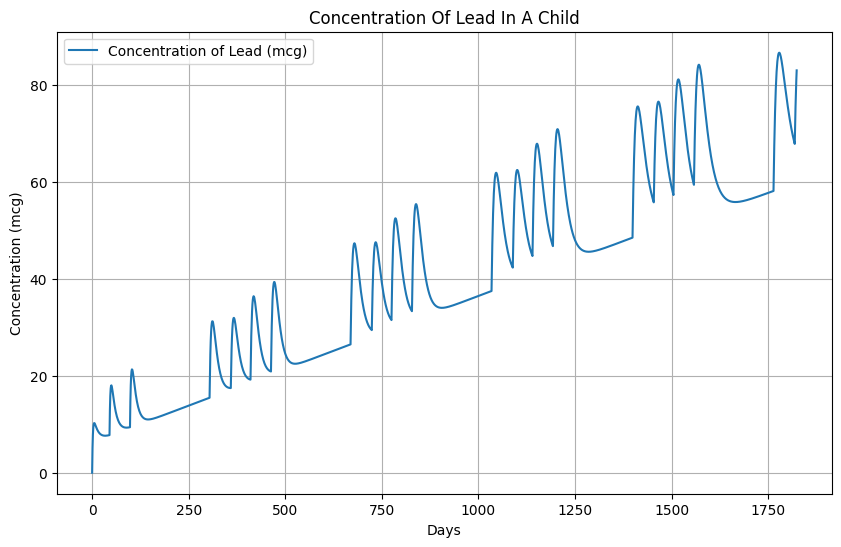

In [ ]:
import math
import matplotlib.pyplot as plt

## Parameters

# Metal Testing
metal = "lead"
# metal = "cadmium"

# Proportional constant for consumption vs storage
r = 0.1

# Constant input of candy
k = 50

# Concentrations
m = None
if metal == "lead":
  m = .615 # lead (mcg/serving)
elif metal == "cadmium":
  m = 6.986 # cadmium (mcg/serving)

# Helper function for intake
def annual_helper(day, shift, A0):
  return A0 * pow(math.e, -r*((day-shift) % 365))

# Returns how much candy one might have in some day
def annual_intake(day):
  A = annual_helper(day, 98, 100) + annual_helper(day, 304, 97) + annual_helper(day, 45, 97) + annual_helper(day, 359, 85) + k
  return A

def propensity(day):
  year = day // 365
  if year < 4:
    return .86
  if year < 10:
    return .84
  if year < 17:
    return 1
  if year < 44:
    return .96
  return .80

def blood_half_life_helper(day):
  year = day / 365
  return 2.9191 * year + 1.67

def removal_constant(day):
  return math.log(2) / blood_half_life_helper(day)

# Returns how much one intakes in some day
def intake(day):
  return annual_intake(day) * propensity(day) * m * r


if __name__ == "__main__":
  years = 5
  results = []
  C = 0
  for i in range(365 * years):
    results.append(C)
    dC_dt = intake(i) - removal_constant(i) * C
    C += dC_dt

  days = range(0, 365*years)

  # Plot the daily intake
  plt.figure(figsize=(10, 6))
  plt.plot(days, results, label="Concentration of Lead (mcg)")
  plt.xlabel("Days")
  plt.ylabel("Concentration (mcg)")
  plt.title("Concentration Of Lead In A Child")
  plt.legend()
  plt.grid(True)
  plt.show()




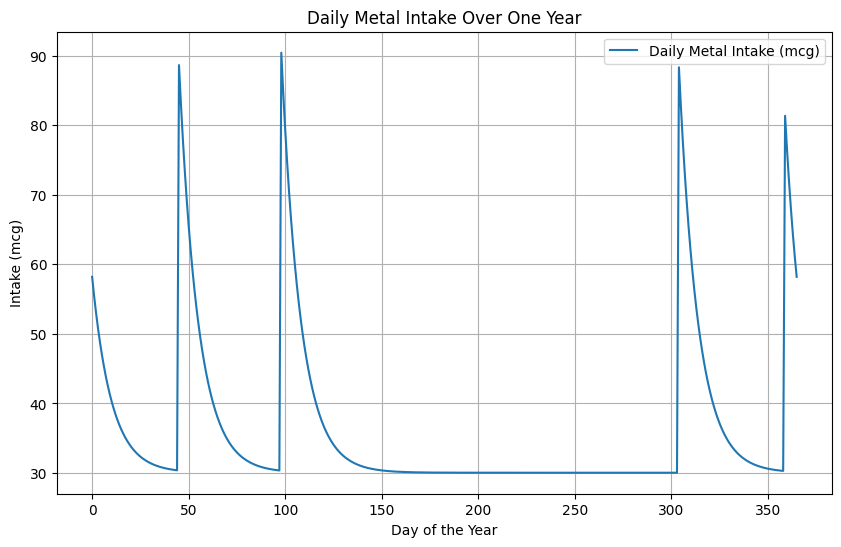

In [ ]:
import math
import matplotlib.pyplot as plt

## Parameters

# Metal Testing
# metal = "lead"
metal = "cadmium"

# Proportional constant for consumption vs storage
r = 0.1

# Constant input of candy
k = 50

# Concentrations
m = None
if metal == "lead":
    m = 0.615  # lead (mcg/serving)
elif metal == "cadmium":
    m = 6.986  # cadmium (mcg/serving)

# Helper function for intake
def annual_helper(day, shift, A0):
    return A0 * pow(math.e, -r * ((day - shift) % 365))

# Returns how much candy one might have on a given day
def annual_intake(day):
    A = (
        annual_helper(day, 98, 100) +
        annual_helper(day, 304, 97) +
        annual_helper(day, 45, 97) +
        annual_helper(day, 359, 85) +
        k
    )
    return A

# Propensity for consumption based on age categories
def propensity(day):
    year = day // 365
    if year < 4:
        return 0.86
    if year < 10:
        return 0.84
    if year < 17:
        return 1.0
    if year < 44:
        return 0.96
    return 0.80

# Blood half-life helper function based on day
def blood_half_life_helper(day):
    year = day / 365
    return 2.9191 * year + 1.67

# Removal constant based on blood half-life
def removal_constant(day):
    return math.log(2) / blood_half_life_helper(day)

# Daily intake calculation function
def intake(day):
    return annual_intake(day) * propensity(day) * m * r

# Plotting the intake over 365 days
if __name__ == "__main__":
    days = range(0, 366)
    intake_values = [intake(day) for day in days]

    # Plot the daily intake
    plt.figure(figsize=(10, 6))
    plt.plot(days, intake_values, label="Daily Metal Intake (mcg)")
    plt.xlabel("Day of the Year")
    plt.ylabel("Intake (mcg)")
    plt.title("Daily Metal Intake Over One Year")
    plt.legend()
    plt.grid(True)
    plt.show()


Code for just the peripheral and main compartment metal accumulation

In [ ]:
import math

## Parameters

# Metal Testing
metal = "lead"
# metal = "cadmium"

# Proportional constant for consumption vs storage
r = 0.1

# Constant input of candy
k = 50

# Concentrations (mcg/serving)
m = None
if metal == "lead":
    m = 0.615
    k12, k21, k10 = 0.05, 0.03, 0.001  # Rate constants for lead (based on typical values)
elif metal == "cadmium":
    m = 6.986
    k12, k21, k10 = 0.03, 0.02, 0.0005  # Rate constants for cadmium (based on typical values)

# Helper function for intake cycles
def annual_helper(day, shift, A0):
    return A0 * pow(math.e, -r * ((day - shift) % 365))

# Calculates candy intake on a given day
def annual_intake(day):
    A = annual_helper(day, 98, 100) + annual_helper(day, 304, 97) + annual_helper(day, 45, 97) + annual_helper(day, 359, 85) + k
    return A

# Adjusted intake propensity based on age
def propensity(day):
    year = day // 365
    if year < 4:
        return 0.86
    if year < 10:
        return 0.84
    if year < 17:
        return 1.0
    if year < 44:
        return 0.96
    return 0.80

# Blood half-life helper function (in years)
def blood_half_life_helper(day):
    year = day / 365
    return 2.9191 * year + 1.67

# Removal constant (depends on age-adjusted half-life)
def removal_constant(day):
    return math.log(2) / blood_half_life_helper(day)

# Accumulation model for metal in blood and peripheral compartments
def metal_accumulation(day, B, P):
    # Amount taken in per day
    daily_intake = annual_intake(day) * propensity(day) * m * r

    # Rate of transfer between compartments and elimination
    dB_dt = daily_intake + k21 * P - (k12 + k10) * B  # Central (blood) compartment
    dP_dt = k12 * B - k21 * P  # Peripheral (tissue) compartment

    # Update compartment amounts
    B += dB_dt
    P += dP_dt

    return B, P

# Calculate daily intake based on model parameters
def intake(day):
    return annual_intake(day) * propensity(day) * m * r

if __name__ == "__main__":
    B, P = 0, 0  # Initial amounts in blood (B) and peripheral tissue (P) compartments
    for day in range(365):  # Example: 1 year of accumulation
        B, P = metal_accumulation(day, B, P)
    print(f"Accumulated metal in blood: {B} mcg")
    print(f"Accumulated metal in peripheral tissues: {P} mcg")


Accumulated metal in blood: 437.67533008186115 mcg
Accumulated metal in peripheral tissues: 652.3301632740231 mcg


Metal Accumulation in body over time - discrete age model

In [ ]:
import math

## Parameters

# Metal Testing
metal = "lead"
# metal = "cadmium"

# Constants for lead or cadmium (in mcg per serving)
m = None
if metal == "lead":
    m = 0.615
    k12, k21, k10 = 0.05, 0.03, 0.001  # Rate constants for lead
elif metal == "cadmium":
    m = 6.986
    k12, k21, k10 = 0.03, 0.02, 0.0005  # Rate constants for cadmium

# Proportional constant for consumption vs storage
r = 0.1

# Constant baseline candy consumption (can be adjusted based on age)
k = 50  # Base amount of candy in servings per day

# Age-based candy intake modifier
def age_based_candy_consumption(age):
    if age < 4:
        return 0.6  # Less candy consumption for very young children
    elif age < 10:
        return 0.8  # Moderate candy consumption for children
    elif age < 18:
        return 1.2  # Higher candy consumption for teenagers
    elif age < 45:
        return 1.0  # Average adult consumption
    else:
        return 0.8  # Slightly reduced consumption for older adults

def annual_intake(day):
    A = annual_helper(day, 98, 100) + annual_helper(day, 304, 97) + annual_helper(day, 45, 97) + annual_helper(day, 359, 85) + k
    return A

# Returns how much candy is consumed on a given day, modified by age
def daily_candy_intake(day, age):
    age_modifier = age_based_candy_consumption(age)
    annual_intake_variation = annual_intake(day)  # Use the holiday-based annual intake function
    return annual_intake_variation * age_modifier

# Accumulation function for metal in blood and peripheral compartments
def metal_accumulation(day, age, B, P):
    # Amount of candy consumed daily, modified by age
    daily_intake = daily_candy_intake(day, age) * m * r

    # Rate of transfer between compartments and elimination
    dB_dt = daily_intake + k21 * P - (k12 + k10) * B  # Blood compartment
    dP_dt = k12 * B - k21 * P  # Peripheral (tissue) compartment

    # Update compartments for the next day
    B += dB_dt
    P += dP_dt

    return B, P

# Discrete simulation for age-based candy consumption and metal accumulation over multiple years
def discrete_age_model(years):
    B, P = 0, 0  # Initial metal levels in blood (B) and peripheral tissues (P)
    results = []
    for day in range(365 * years):  # Simulate for a given number of years
        age = day // 365  # Age increases with each year
        B, P = metal_accumulation(day % 365, age, B, P)  # Update based on daily intake
        results.append((day, age, B, P))  # Store results for each day
    return results

if __name__ == "__main__":
    years = 10  # Simulate over 10 years
    model_results = discrete_age_model(years)
    for day, age, blood, tissue in model_results:
        if day % 365 == 0:  # Print yearly results
            print(f"Day {day}: Age {age} - Blood: {blood:.2f} mcg, Tissue: {tissue:.2f} mcg")


Day 0: Age 0 - Blood: 3.57 mcg, Tissue: 0.00 mcg
Day 365: Age 1 - Blood: 307.01 mcg, Tissue: 456.73 mcg
Day 730: Age 2 - Blood: 553.84 mcg, Tissue: 873.28 mcg
Day 1095: Age 3 - Blood: 769.33 mcg, Tissue: 1236.93 mcg
Day 1460: Age 4 - Blood: 958.63 mcg, Tissue: 1554.39 mcg
Day 1825: Age 5 - Blood: 1224.00 mcg, Tissue: 1983.77 mcg
Day 2190: Age 6 - Blood: 1449.64 mcg, Tissue: 2364.56 mcg
Day 2555: Age 7 - Blood: 1646.62 mcg, Tissue: 2696.99 mcg
Day 2920: Age 8 - Blood: 1818.58 mcg, Tissue: 2987.19 mcg
Day 3285: Age 9 - Blood: 1968.70 mcg, Tissue: 3240.53 mcg


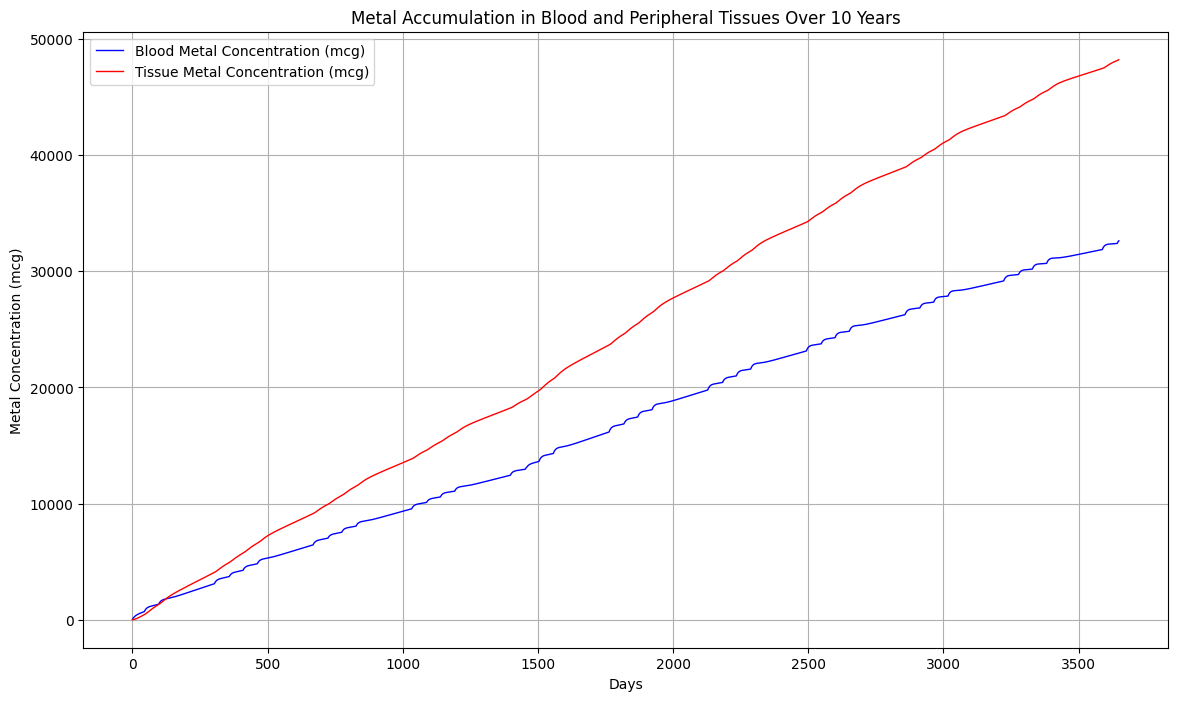

In [ ]:
# Re-importing necessary libraries after environment reset
import math
import matplotlib.pyplot as plt

# Metal Testing
metal = "cadmium"  # Change to "cadmium" for cadmium testing

# Constants for lead or cadmium (in mcg per serving)
m = None
if metal == "lead":
    m = 0.615
    k12, k21, k10 = 0.05, 0.03, 0.001  # Rate constants for lead
elif metal == "cadmium":
    m = 6.986
    k12, k21, k10 = 0.03, 0.02, 0.0005  # Rate constants for cadmium

# Proportional constant for consumption vs storage
r = 0.1

# Constant baseline candy consumption (can be adjusted based on age)
k = 50  # Base amount of candy in servings per day

# Age-based candy intake modifier
def age_based_candy_consumption(age):
    if age < 4:
        return 0.6  # Less candy consumption for very young children
    elif age < 10:
        return 0.8  # Moderate candy consumption for children
    elif age < 18:
        return 1.2  # Higher candy consumption for teenagers
    elif age < 45:
        return 1.0  # Average adult consumption
    else:
        return 0.8  # Slightly reduced consumption for older adults

# Holiday-based candy consumption spikes
def annual_helper(day, shift, A0):
    decay_rate = 0.1
    return A0 * math.exp(-decay_rate * ((day - shift) % 365))

def annual_intake(day):
    return annual_helper(day, 98, 100) + annual_helper(day, 304, 97) + \
           annual_helper(day, 45, 97) + annual_helper(day, 359, 85) + k

# Daily candy intake adjusted for age and holidays
def daily_candy_intake(day, age):
    age_modifier = age_based_candy_consumption(age)
    return annual_intake(day) * age_modifier

# Metal accumulation function
def metal_accumulation(day, age, B, P):
    daily_intake = daily_candy_intake(day, age) * m * r
    dB_dt = daily_intake + k21 * P - (k12 + k10) * B  # Blood compartment
    dP_dt = k12 * B - k21 * P  # Peripheral (tissue) compartment
    B += dB_dt
    P += dP_dt
    return B, P

# Simulation function over multiple years
def discrete_age_model(years):
    B, P = 0, 0  # Initial metal levels in blood (B) and peripheral tissues (P)
    results = []
    for day in range(365 * years):
        age = day // 365  # Age increases with each year
        B, P = metal_accumulation(day % 365, age, B, P)  # Update based on daily intake
        results.append((day, age, B, P))  # Store results for each day
    return results

# Running the model and storing results
years = 10  # Simulation duration
model_results = discrete_age_model(years)

# Extracting data for graphing
days = [result[0] for result in model_results]
blood_levels = [result[2] for result in model_results]
tissue_levels = [result[3] for result in model_results]

# Plotting the results
plt.figure(figsize=(14, 8))

# Blood metal concentration graph
plt.plot(days, blood_levels, label='Blood Metal Concentration (mcg)', color='blue', linewidth=1)

# Peripheral tissue metal concentration graph
plt.plot(days, tissue_levels, label='Tissue Metal Concentration (mcg)', color='red', linewidth=1)

# Graph formatting
plt.xlabel("Days")
plt.ylabel("Metal Concentration (mcg)")
plt.title("Metal Accumulation in Blood and Peripheral Tissues Over 10 Years")
plt.legend()
plt.grid(True)
plt.show()
